# RNN (10주차)

SEOYEON CHOI  
2022-11-09

기계학습 특강 (10주차) 11월9일 \[순환신경망– abc예제, abdc예제,
abcde예제, AbAcAd예제\]

## import

In [5]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

------------------------------------------------------------------------

선행학습

In [3]:
for i in '123':
    print(i)

1
2
3

`iterable object?`

In [23]:
a = 3
for i in a:
    print(i)

In [25]:
a__iter__()

In [27]:
set(dir(a)) & {'__iter__'}

set()

이게 없어

In [28]:
a = '3'
for i in a:
    print(i)

3

In [29]:
set(dir(a)) & {'__iter__'}

{'__iter__'}

이제 있음

In [38]:
a = [1,2,3]
for i in a:
    print(i)

1
2
3

In [39]:
set(dir(a)) & {'__iter__'}

{'__iter__'}

In [40]:
a.__iter__()

In [41]:
aa = iter(a)

In [43]:
aa.__next__()

1

In [44]:
aa.__next__()

2

In [45]:
aa.__next__()

3

In [46]:
aa.__next__()

`StopIteration` iter 끝내는 옵션

In [47]:
a = range(3)
for i in a:
    print(i)

0
1
2

In [53]:
aa = a.__iter__()

In [54]:
aa.__next__()

0

In [55]:
aa.__next__()

1

In [56]:
aa.__next__()

2

In [57]:
aa.__next__()

------------------------------------------------------------------------

## 예비학습: `net.parameters()`의 의미

9월27일 강의노트 중 “`net.parameters()`의 의미?”를 설명한다.

`-` iterator, generator의 개념필요 -
https://guebin.github.io/IP2022/2022/06/06/(14주차)-6월6일.html,
클래스공부 8단계 참고

`-` 탐구시작: 네트워크 생성

In [9]:
net = torch.nn.Linear(in_features=1,out_features=1)
net.weight

Parameter containing:
tensor([[0.7520]], requires_grad=True)

In [10]:
net.bias

Parameter containing:
tensor([-0.8206], requires_grad=True)

`-` torch.optim.SGD? 를 확인하면 params에 대한설명에 아래와 같이
되어있음

    params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups

In [11]:
net.parameters() ## generator = 

<generator object Module.parameters at 0x7f6e8ac0f9d0>

`-` 설명을 읽어보면 params에 iterable object를 넣으라고 되어있음
(iterable object는 숨겨진 명령어로 `__iter__`를 가지고 있는 오브젝트를
의미)

In [12]:
set(dir(net.parameters())) & {'__iter__'}

{'__iter__'}

`-` 무슨의미?

In [13]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[0.7520]], requires_grad=True)
Parameter containing:
tensor([-0.8206], requires_grad=True)

`-` 그냥 이건 이런느낌인데?

In [14]:
for param in [net.weight,net.bias]:
    print(param)

Parameter containing:
tensor([[0.7520]], requires_grad=True)
Parameter containing:
tensor([-0.8206], requires_grad=True)

결론: `net.parameters()`는 net오브젝트에서 학습할 파라메터를 모두 모아
리스트같은 iterable object로 만드는 함수라 이해할 수 있다.

``` python
yhat = net(x)
```

꼭 이런 식으로 정의할 필요는 없다

`-` 응용예제1

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022_backup/master/_notebooks/2022-09-22-regression.csv") 
x=torch.tensor(df.x).float().reshape(100,1)
y=torch.tensor(df.y).float().reshape(100,1)

In [19]:
b = torch.tensor(-5.0,requires_grad=True)
w = torch.tensor(10.0,requires_grad=True)
optimizr = torch.optim.SGD([b,w],lr=1/10) ## 이렇게 전달하면 됩니당!!

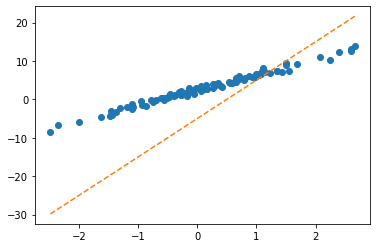

In [20]:
plt.plot(x,y,'o')
plt.plot(x,(w*x+b).data,'--')

In [21]:
for epoc in range(30):
    ## step1
    yhat = b+ w*x 
    ## step2
    loss = torch.mean((y-yhat)**2)
    ## step3
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

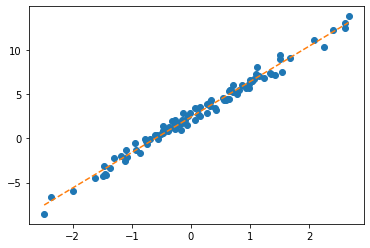

In [22]:
plt.plot(x,y,'o')
plt.plot(x,(w*x+b).data,'--')

`-` 응용예제2

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022_backup/master/_notebooks/2022-09-22-regression.csv") 
x = torch.tensor(df.x).float().reshape(100,1)
y = torch.tensor(df.y).float().reshape(100,1)
X = torch.concat([torch.ones_like(x),x],axis=1)

In [25]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
optimizr = torch.optim.SGD([What],lr=1/10) # What은 iterable 하지 않지만 [What]은 iterable 함

In [26]:
What

tensor([[-5.],
        [10.]], requires_grad=True)

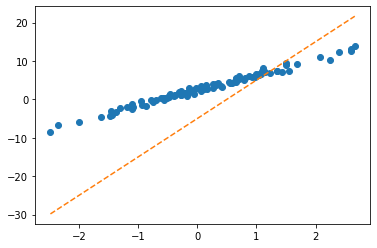

In [27]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

In [28]:
for epoc in range(30):
    ## step1
    yhat = X@What 
    ## step2 
    loss = torch.mean((y-yhat)**2)
    ## step3
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad() 

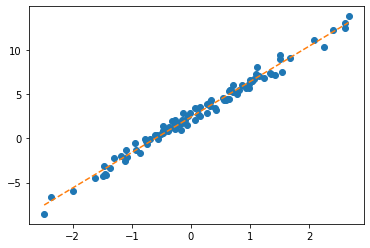

In [29]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

### 스스로 학습 (중간고사 대체과제)

아래와 같은 자료가 있다고 가정하자.

In [30]:
x = torch.rand([1000,1])*2-1
y = 3.14 + 6.28*x + torch.randn([1000,1]) 

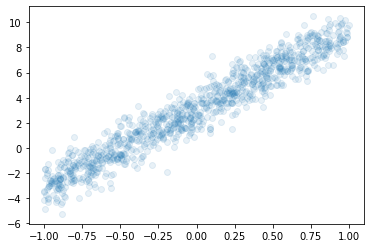

In [31]:
plt.plot(x,y,'o',alpha=0.1)

아래의 모형을 가정하고 $\alpha_0,\alpha_1,\beta_0,\beta_1$을 파이토치를
이용하여 추정하고자한다.

-   $y_i = \alpha_0+\beta_0+ \beta_1x_i + \alpha_1x_i + \epsilon_i \quad \epsilon_i \sim N(0,\sigma^2)$

아래는 이를 수행하기 위한 코드이다. ???를 적절히 채워서 코드를 완성하라.

In [32]:
alpha0 = torch.tensor([0.5], requires_grad=True)
alpha1 = torch.tensor([[0.5]], requires_grad=True)
beta0 = torch.tensor([0.7], requires_grad=True)
beta1 = torch.tensor([[0.7]], requires_grad=True)

In [83]:
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.SGD([alpha0,alpha1,beta0,beta1], lr=1/10)

In [84]:
for epoc in range(30):
    ## 1
    yhat = alpha0 + beta0 + alpha1*x + beta1*x 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [85]:
print(alpha0+beta0)

tensor([3.1279], grad_fn=<AddBackward0>)

-   3.14 근처

In [86]:
print(alpha1+beta1)

tensor([[6.0170]], grad_fn=<AddBackward0>)

-   6.28 근처

## Define some funtions

In [87]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 
soft = torch.nn.Softmax(dim=1)

## Exam2: abc

### data

In [88]:
txt = list('abc')*100
txt[:10]

['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c', 'a']

In [89]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [90]:
txt_x[:5],txt_y[:5]

(['a', 'b', 'c', 'a', 'b'], ['b', 'c', 'a', 'b', 'c'])

### 하나의 은닉노드를 이용한 풀이 – 억지로 성공

`-` 데이터정리

In [91]:
mapping = {'a':0,'b':1,'c':2}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 0, 1]), tensor([1, 2, 0, 1, 2]))

`-` 학습

In [92]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=3,embedding_dim=1),
    torch.nn.Tanh(),
    #===#
    torch.nn.Linear(in_features=1,out_features=3)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [93]:
for epoc in range(5000):
    ## 1
    ## 2 
    loss = loss_fn(net(x),y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

``` python
net[0] = embedding
net[1] = tanh
net[2] = linear
```

`-` 결과해석

In [94]:
hidden = net[:-1](x).data
yhat = soft(net(x)).data

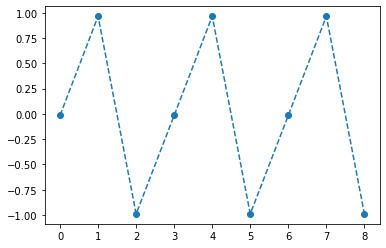

In [95]:
plt.plot(hidden[:9],'--o')

-   a blue
-   b orange
-   c green

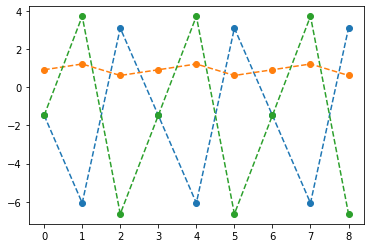

In [96]:
plt.plot(net(x).data[:9],'--o')

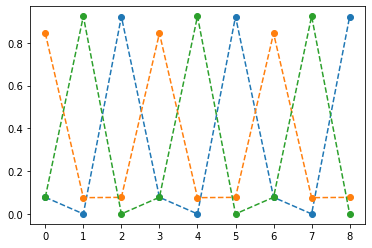

In [97]:
plt.plot(yhat[:9],'--o')

-   억지로 맞추고있긴한데 파라메터가 부족해보인다.

`-` 결과시각화1

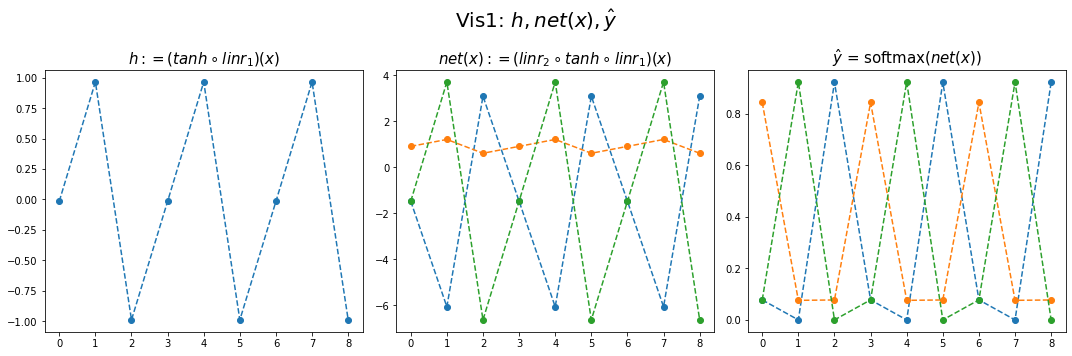

In [100]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$',size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x):=(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h,net(x),\hat{y}$",size=20)
plt.tight_layout()

-   학습이 제대로 되었다면 0의 결과가 나오지 않지
-   net진행될때 거의 w만 곱한 결과가 나오는 것인데 0이 hidden에서 나오면
    w만 곱해도 변화가 없잖아? 그래서 주황색 선이 나온 거고

`-` 첫번째 그림 $\to$ 두번빼 그림

In [103]:
net[2].weight,net[2].bias

(Parameter containing:
 tensor([[-4.6804],
         [ 0.3071],
         [ 5.2894]], requires_grad=True),
 Parameter containing:
 tensor([-1.5440,  0.9143, -1.3970], requires_grad=True))

In [104]:
hidden[:9], (net[-1].weight.data).T, net[-1].bias.data

(tensor([[-0.0147],
         [ 0.9653],
         [-0.9896],
         [-0.0147],
         [ 0.9653],
         [-0.9896],
         [-0.0147],
         [ 0.9653],
         [-0.9896]]),
 tensor([[-4.6804,  0.3071,  5.2894]]),
 tensor([-1.5440,  0.9143, -1.3970]))

In [108]:
hidden[:9].shape

torch.Size([9, 1])

In [106]:
net[-1].weight.data.shape

torch.Size([3, 1])

In [107]:
(net[-1].weight.data.T).shape

torch.Size([1, 3])

In [105]:
hidden[:9]@(net[-1].weight.data).T + net[-1].bias.data

tensor([[-1.4755,  0.9098, -1.4745],
        [-6.0618,  1.2108,  3.7086],
        [ 3.0875,  0.6104, -6.6312],
        [-1.4755,  0.9098, -1.4745],
        [-6.0618,  1.2108,  3.7086],
        [ 3.0875,  0.6104, -6.6312],
        [-1.4755,  0.9098, -1.4745],
        [-6.0618,  1.2108,  3.7086],
        [ 3.0875,  0.6104, -6.6312]])

-   (파랑,주황,초록) 순서로 그려짐
-   파랑 = hidden \* (-4.6804) + (-1.5440)
-   주황 = hidden \* (0.3071) + (0.9143)
-   초록 = hidden \* (5.2894) + (-1.3970)

`-` 내부동작을 잘 뜯어보니까 사실 엉성해. 엄청 위태위태하게 맞추고
있었음. - weight: 파랑과 초록을 구분하는 역할을 함 - weight + bias: 뭔가
교모하게 애매한 주황값을 만들어서 애매하게 ’b’라고 나올 확률을
학습시킨다. $\to$ 사실 학습하는 것 같지 않고 때려 맞추는 느낌, 쓸수있는
weight가 한정적이라서 생기는 현상 (양수,음수,0)

------------------------------------------------------------------------

**[참고](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html):
torch.nn.Linear()의 비밀?** - 사실
${\boldsymbol y}={\boldsymbol x}{\bf W} + {\boldsymbol b}$ 꼴에서의
${\bf W}$와 ${\boldsymbol b}$가 저장되는게 아니다. -
${\boldsymbol y}={\boldsymbol x}{\bf A}^T + {\boldsymbol b}$ 꼴에서의
${\bf A}$와 ${\boldsymbol b}$가 저장된다. - ${\bf W} = {\bf A}^T$ 인
관계에 있으므로 l1.weight 가 우리가 생각하는 ${\bf W}$ 로 해석하려면
사실 transpose를 취해줘야 한다.

**왜 이렇게..?** - 계산의 효율성 때문 (numpy의 구조를 알아야함) -
${\boldsymbol x}$, ${\boldsymbol y}$ 는 수학적으로는 col-vec 이지만
메모리에 저장할시에는 row-vec 로 해석하는 것이 자연스럽다. (사실
메모리는 격자모양으로 되어있지 않음)

***잠깐 딴소리!!***

(예시1)

In [109]:
_arr = np.array(range(4)).reshape(2,2)
_arr

array([[0, 1],
       [2, 3]])

In [112]:
_arr.strides

(16, 8)

-   아래로 한칸 = 16칸 jump
-   오른쪽으로 한칸 = 8칸 jump

(예시2)

In [113]:
_arr = np.array(range(6)).reshape(3,2)
_arr

array([[0, 1],
       [2, 3],
       [4, 5]])

In [114]:
_arr.strides

(16, 8)

-   아래로 한칸 = 16칸 jump
-   오른쪽으로 한칸 = 8칸 jump

(예시3)

In [115]:
_arr = np.array(range(6)).reshape(2,3)
_arr

array([[0, 1, 2],
       [3, 4, 5]])

In [116]:
_arr.strides

(24, 8)

-   아래로 한칸 = 24칸 jump
-   오른쪽으로 한칸 = 8칸 jump

(예시4)

In [117]:
_arr = np.array(range(4),dtype=np.int8).reshape(2,2)
_arr

array([[0, 1],
       [2, 3]], dtype=int8)

In [119]:
_arr.strides

(2, 1)

-   아래로한칸 = 2칸 (= 2바이트 jump = 16비트 jump)
-   오른쪽으로 한칸 = 1칸 jump (= 1바이트 jump = 8비트 jump)

In [124]:
_arr = np.array(range(4),dtype=np.float64).reshape(2,2)
_arr

array([[0., 1.],
       [2., 3.]])

In [125]:
_arr.strides

(16, 8)

In [126]:
_arr = np.array(range(4),dtype=np.float32).reshape(2,2)
_arr

array([[0., 1.],
       [2., 3.]], dtype=float32)

In [127]:
_arr.strides

(8, 4)

**진짜 참고..**

-   1바이트 = 8비트
-   1바이트는 2^8=256 의 정보 표현
-   np.int8은 8비트로 정수를 저장한다는 의미

In [128]:
2**8

256

In [129]:
print(np.array(55,dtype=np.int8))
print(np.array(127,dtype=np.int8))
print(np.array(300,dtype=np.int8)) # overflow 

55
127
44

***딴소리 끝!!***

weight의 transfose가 저장되는 이유 끝!

혼자 크다고 인식하면 바꾸는…

------------------------------------------------------------------------

`-` 결과시각화2

In [130]:
combined  = torch.concat([hidden,net(x).data,yhat],axis=1)
combined.shape

torch.Size([299, 7])

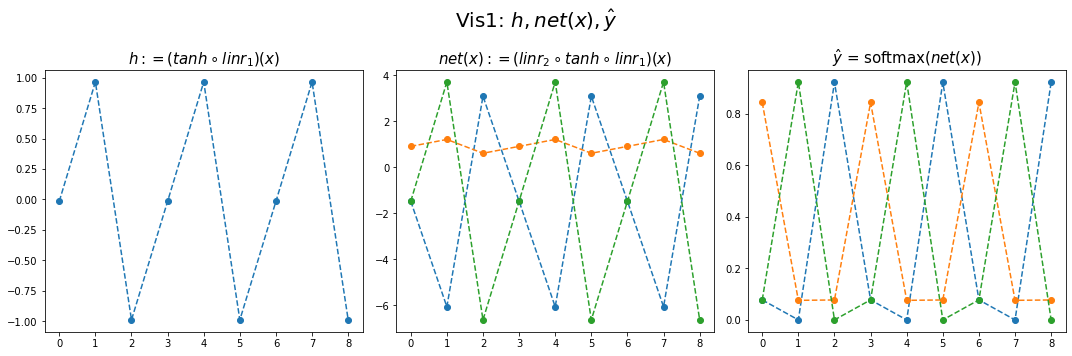

In [131]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$',size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x):=(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h,net(x),\hat{y}$",size=20)
plt.tight_layout()

Text(0.5, 1.0, 'Vis2: $[h | net(x) | \\hat{y}]$')

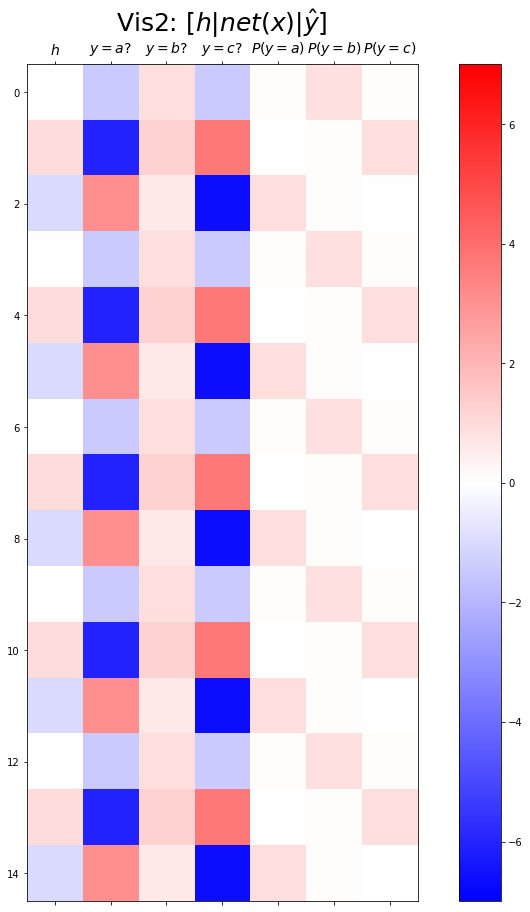

In [132]:
plt.matshow(combined[:15],vmin=-7,vmax=7,cmap='bwr')
plt.xticks(range(7), labels=[r'$h$',r'$y=a?$',r'$y=b?$',r'$y=c?$',r'$P(y=a)$',r'$P(y=b)$',r'$P(y=c)$'],size=14)
plt.colorbar()
plt.gcf().set_figwidth(15)
plt.gcf().set_figheight(15)
plt.title(r"Vis2: $[h | net(x) | \hat{y}]$",size=25)

## Exam3: abcd

### data

In [133]:
txt = list('abcd')*100
txt[:10]

['a', 'b', 'c', 'd', 'a', 'b', 'c', 'd', 'a', 'b']

In [134]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [135]:
txt_x[:5],txt_y[:5]

(['a', 'b', 'c', 'd', 'a'], ['b', 'c', 'd', 'a', 'b'])

### 하나의 은닉노드를 이용한 풀이 – 억지로 성공

`-` 데이터정리

In [136]:
mapping = {'a':0,'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 3, 0]), tensor([1, 2, 3, 0, 1]))

`-` 학습

In [137]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=1),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=1,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [138]:
net[0].weight.data = torch.tensor([[-0.3333],[-2.5000],[5.0000],[0.3333]])

net[-1].weight.data = torch.tensor([[1.5000],[-6.0000],[-2.0000],[6.0000]])
net[-1].bias.data = torch.tensor([0.1500, -2.0000,  0.1500, -2.000])

In [139]:
for epoc in range(5000):
    ## 1
    ## 2 
    loss = loss_fn(net(x),y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`-` 결과시각화1

In [140]:
hidden = net[:-1](x).data
yhat = soft(net(x)).data

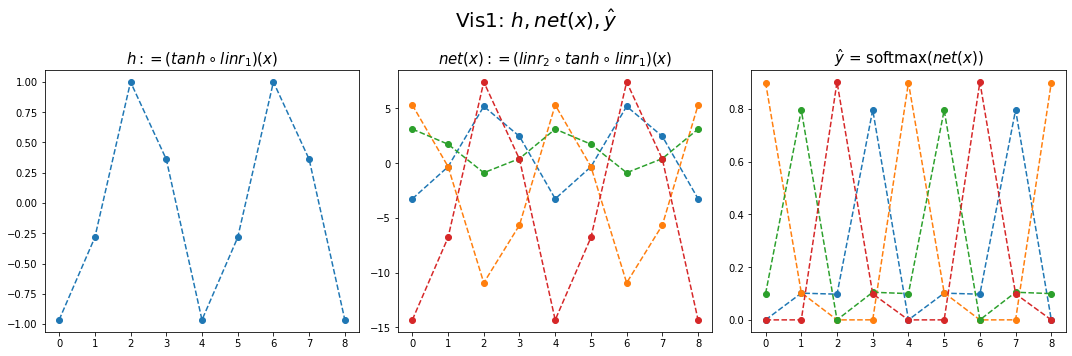

In [141]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$',size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x):=(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h,net(x),\hat{y}$",size=20)
plt.tight_layout()

`-` 결과시각화2

In [142]:
combined  = torch.concat([hidden,net(x).data,yhat],axis=1)
combined.shape

torch.Size([399, 9])

Text(0.5, 1.0, 'Vis2: $[h | net(x) | \\hat{y}]$')

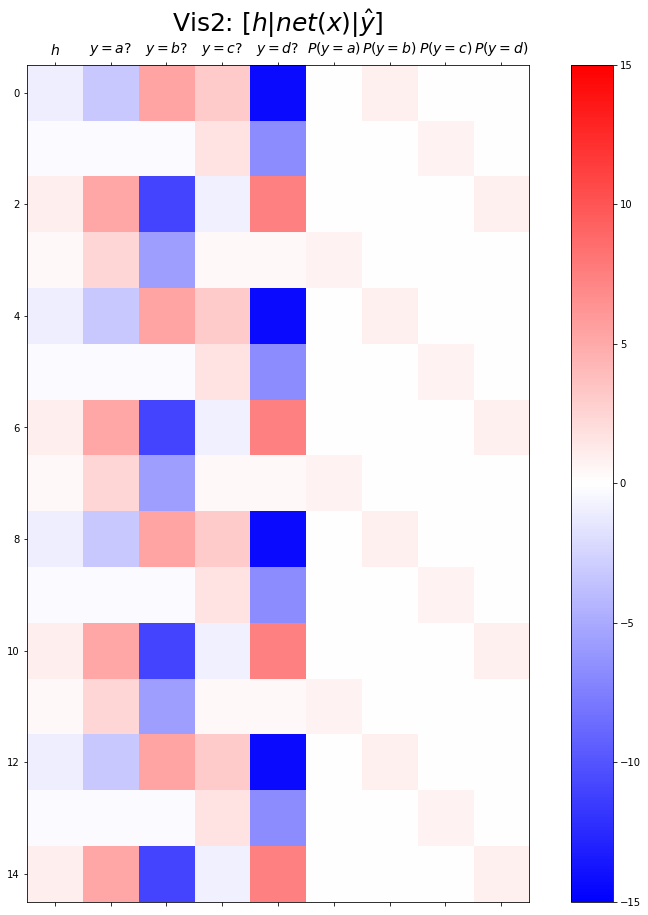

In [143]:
plt.matshow(combined[:15],vmin=-15,vmax=15,cmap='bwr')
plt.xticks(range(9), labels=[r'$h$',r'$y=a?$',r'$y=b?$',r'$y=c?$',r'$y=d?$',r'$P(y=a)$',r'$P(y=b)$',r'$P(y=c)$',r'$P(y=d)$'],size=14)
plt.colorbar()
plt.gcf().set_figwidth(15)
plt.gcf().set_figheight(15)
plt.title(r"Vis2: $[h | net(x) | \hat{y}]$",size=25)

맞춘게 아니야. 0 근처인게 있잖아 hidden에서

### 두개의 은닉노드를 이용한 풀이 – 깔끔한 성공

`-` 데이터정리

In [144]:
mapping = {'a':0,'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 3, 0]), tensor([1, 2, 3, 0, 1]))

`-` 학습

In [145]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=2),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=2,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [146]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`-` 결과시각화1

In [147]:
hidden = net[:-1](x).data
yhat = soft(net(x)).data

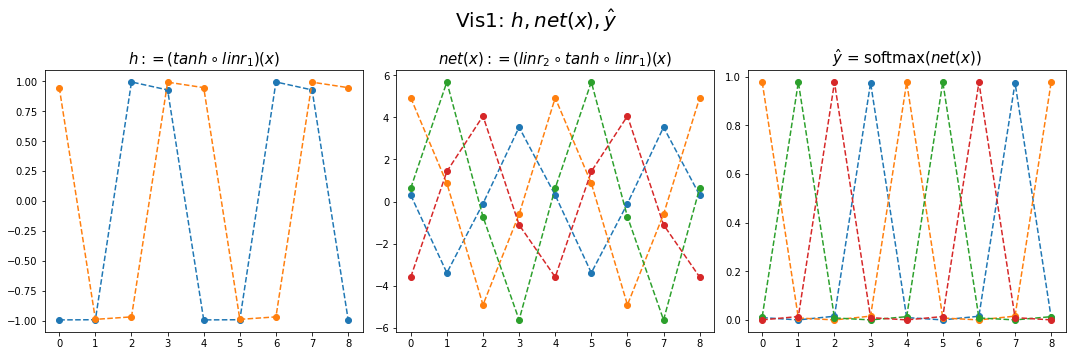

In [148]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$',size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x):=(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h,net(x),\hat{y}$",size=20)
plt.tight_layout()

`-` 결과시각화2

In [149]:
combined  = torch.concat([hidden,net(x).data,yhat],axis=1)
combined.shape

torch.Size([399, 10])

Text(0.5, 1.0, 'Vis2: $[h | net(x) | \\hat{y}]$')

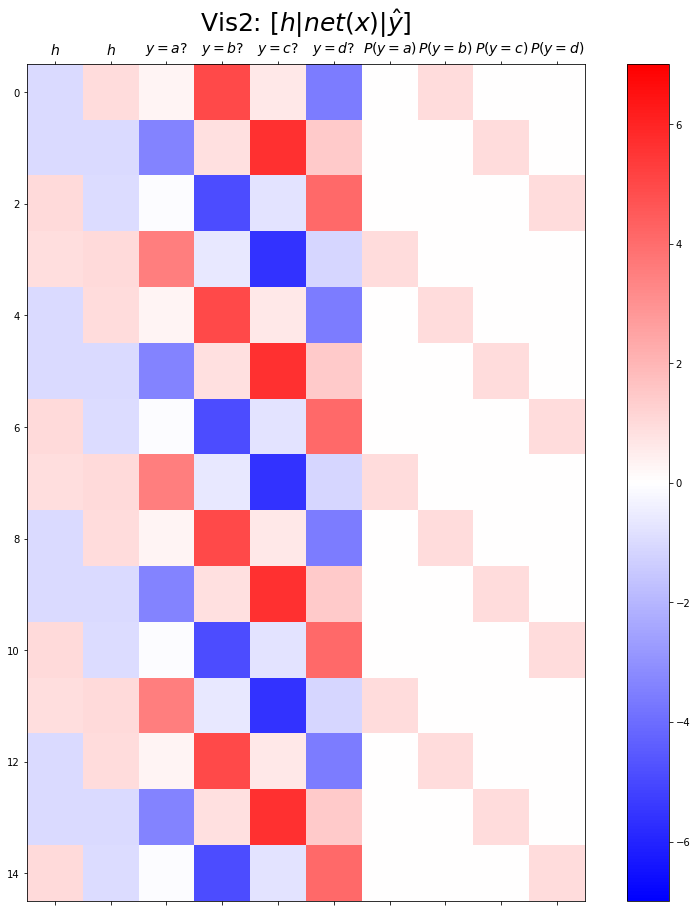

In [150]:
plt.matshow(combined[:15],vmin=-7,vmax=7,cmap='bwr')
plt.xticks(range(10), labels=[r'$h$',r'$h$',r'$y=a?$',r'$y=b?$',r'$y=c?$',r'$y=d?$',r'$P(y=a)$',r'$P(y=b)$',r'$P(y=c)$',r'$P(y=d)$'],size=14)
plt.colorbar()
plt.gcf().set_figwidth(15)
plt.gcf().set_figheight(15)
plt.title(r"Vis2: $[h | net(x) | \hat{y}]$",size=25)

-   hidden layer 2장만으로 4가지 state 표현

## Exam4: abcde (스스로 공부)

### data

주어진 자료가 다음과 같다고 하자.

In [151]:
txt = list('abcde')*100
txt[:10]

['a', 'b', 'c', 'd', 'e', 'a', 'b', 'c', 'd', 'e']

In [152]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [153]:
txt_x[:5],txt_y[:5]

(['a', 'b', 'c', 'd', 'e'], ['b', 'c', 'd', 'e', 'a'])

아래 코드를 변형하여 적절한 네트워크를 설계하고 위의 자료를 학습하라.
(깔끔한 성공을 위한 최소한의 은닉노드를 설정할 것)

``` python
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=??,embedding_dim=??),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=??,out_features=??)
)
```

### 3개의 은닉노드를 이용한 풀이

a,b,c,d,e 를 표현함에 있어서 3개의 은닉노드면 충분하다. - 1개의 은닉노드
-\> 2개의 문자를 표현할 수 있음. ($2^1$) - 2개의 은닉노드 -\> 4개의
문자를 표현할 수 있음. ($2^2$) - 3개의 은닉노드 -\> 8개의 문자를 표현할
수 있음. ($2^3$)

In [154]:
mapping = {'a':0,'b':1,'c':2,'d':3,'e':4}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 3, 4]), tensor([1, 2, 3, 4, 0]))

In [155]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=5,embedding_dim=3),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=3,out_features=5)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [156]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`-` 결과시각화1

In [157]:
hidden = net[:-1](x).data
yhat = soft(net(x)).data

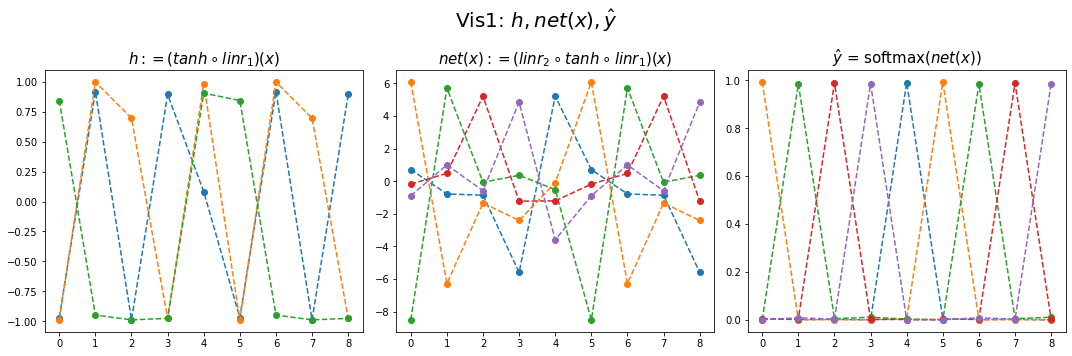

In [158]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$',size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x):=(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h,net(x),\hat{y}$",size=20)
plt.tight_layout()

`-` 결과시각화2

In [159]:
combined  = torch.concat([hidden,net(x).data,yhat],axis=1)
combined.shape

torch.Size([499, 13])

Text(0.5, 1.0, 'Vis2: $[h | net(x) | \\hat{y}]$')

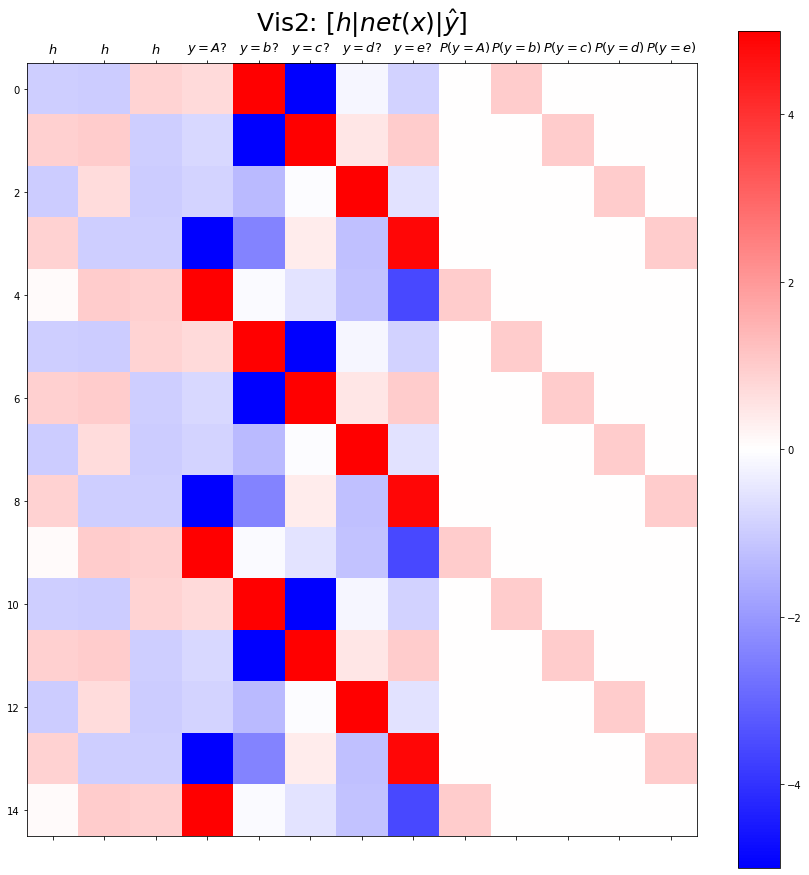

In [160]:
plt.matshow(combined[:15],vmin=-5,vmax=5,cmap='bwr')
plt.xticks(range(13), labels=[r'$h$',r'$h$',r'$h$',
                              r'$y=A?$',r'$y=b?$',r'$y=c?$',r'$y=d?$',r'$y=e?$',
                              r'$P(y=A)$',r'$P(y=b)$',r'$P(y=c)$',r'$P(y=d)$',r'$P(y=e)$'],size=13)
plt.colorbar()
plt.gcf().set_figwidth(15)
plt.gcf().set_figheight(15)
plt.title(r"Vis2: $[h | net(x) | \hat{y}]$",size=25)

## Exam5: AbAcAd

### data

In [161]:
txt = list('AbAcAd')*100
txt[:10]

['A', 'b', 'A', 'c', 'A', 'd', 'A', 'b', 'A', 'c']

In [162]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [163]:
txt_x[:5],txt_y[:5]

(['A', 'b', 'A', 'c', 'A'], ['b', 'A', 'c', 'A', 'd'])

### 두개의 은닉노드를 이용한 풀이 – 실패

`-` 데이터정리

In [164]:
mapping = {'A':0,'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 0, 2, 0]), tensor([1, 0, 2, 0, 3]))

`-` 학습

In [165]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=2),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=2,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [166]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`-` 결과시각화1

In [167]:
hidden = net[:-1](x).data
yhat = soft(net(x)).data

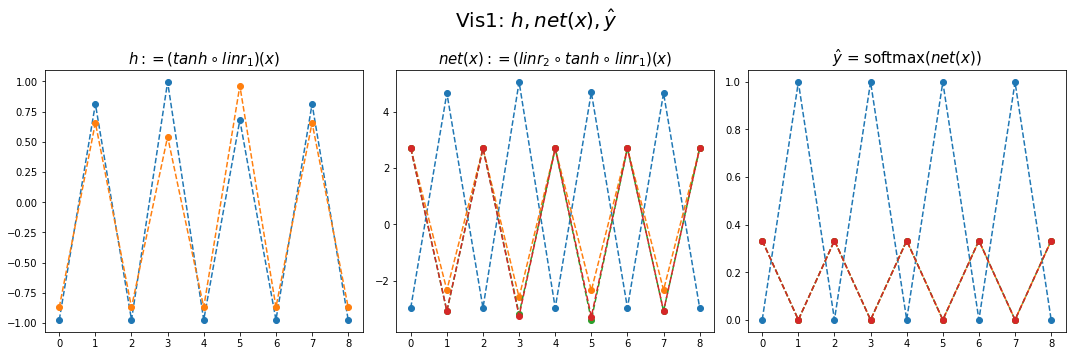

In [168]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$',size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x):=(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h,net(x),\hat{y}$",size=20)
plt.tight_layout()

`-` 결과시각화2

In [169]:
combined  = torch.concat([hidden,net(x).data,yhat],axis=1)
combined.shape

torch.Size([599, 10])

Text(0.5, 1.0, 'Vis2: $[h | net(x) | \\hat{y}]$')

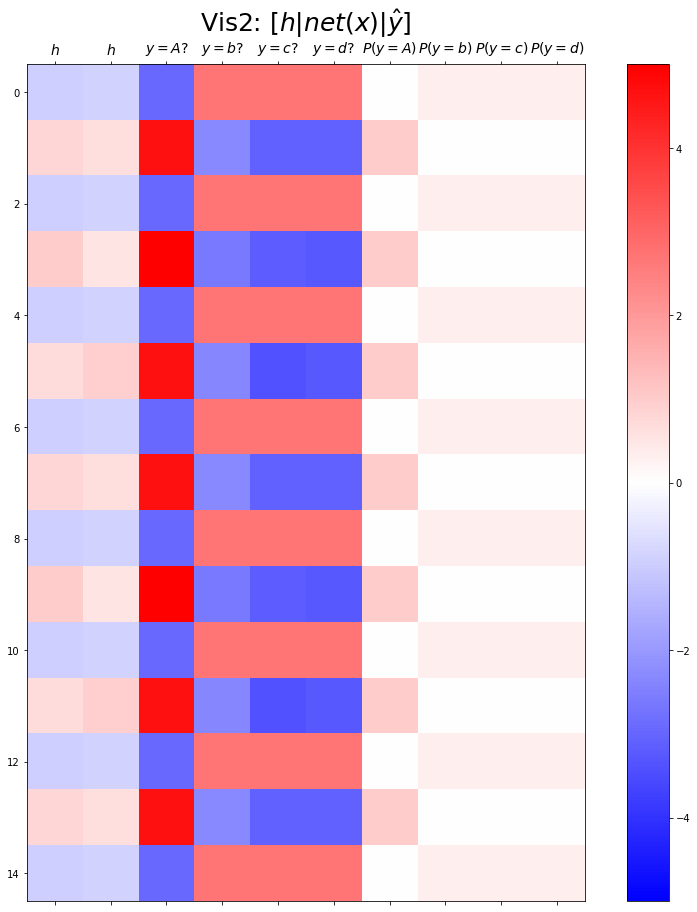

In [170]:
plt.matshow(combined[:15],vmin=-5,vmax=5,cmap='bwr')
plt.xticks(range(10), labels=[r'$h$',r'$h$',r'$y=A?$',r'$y=b?$',r'$y=c?$',r'$y=d?$',r'$P(y=A)$',r'$P(y=b)$',r'$P(y=c)$',r'$P(y=d)$'],size=14)
plt.colorbar()
plt.gcf().set_figwidth(15)
plt.gcf().set_figheight(15)
plt.title(r"Vis2: $[h | net(x) | \hat{y}]$",size=25)

-   A 뒤는 a,b,c 3개 중 하나, 따라서 1/3 의 확률이겠네 하고
    학습해버렸다.

-   observation 마다 봐야하는 x가 달라(수가 )

-   실패

`-` 실패를 해결하는 순진한 접근방식: 위 문제를 해결하기 위해서는 아래와
같은 구조로 데이터를 다시 정리하면 될 것이다.

|  X  |  y  |
|:---:|:---:|
| A,b |  A  |
| b,A |  c  |
| A,c |  A  |
| c,A |  d  |
| A,d |  A  |
| d,A |  b  |
| A,b |  A  |
| b,A |  c  |
|  …  |  …  |

`-` 순진한 접근방식의 비판: - 결국 정확하게 직전 2개의 문자를 보고 다음
문제를 예측하는 구조 - 만약에 직전 3개의 문자를 봐야하는 상황이 된다면
또 다시 코드를 수정해야함. - 그리고 실전에서는 직전 몇개의 문자를
봐야하는지 모름.

***이것에 대한 해결책은 순환신경망이다.***

### 순환망을 위하여 data 다시정리

`-` 기존의 정리방식

In [179]:
txt = list('AbAcAd')*100
txt[:10]

['A', 'b', 'A', 'c', 'A', 'd', 'A', 'b', 'A', 'c']

In [180]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [181]:
txt_x[:5],txt_y[:5]

(['A', 'b', 'A', 'c', 'A'], ['b', 'A', 'c', 'A', 'd'])

In [182]:
x = torch.tensor(f(txt_x,{'A':0,'b':1,'c':2,'d':3}))
y = torch.tensor(f(txt_y,{'A':0,'b':1,'c':2,'d':3}))

In [183]:
x[:8],y[:8]

(tensor([0, 1, 0, 2, 0, 3, 0, 1]), tensor([1, 0, 2, 0, 3, 0, 1, 0]))

`-` 이번엔 원핫인코딩형태까지 미리 정리하자. (임베딩 레이어 안쓸예정)

숫자형태의 벡터형태라고 가정하고 학습하는 순환신경망

In [184]:
x= torch.nn.functional.one_hot(x).float()
y= torch.nn.functional.one_hot(y).float()

In [185]:
x,y

(tensor([[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [0., 0., 1., 0.],
         [1., 0., 0., 0.]]),
 tensor([[0., 1., 0., 0.],
         [1., 0., 0., 0.],
         [0., 0., 1., 0.],
         ...,
         [0., 0., 1., 0.],
         [1., 0., 0., 0.],
         [0., 0., 0., 1.]]))

### 실패했던 풀이의 재구현1

`-` 방금 실패한 풀이

``` python
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=2),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=2,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
```

`-` Tanh까지만 클래스로 바꾸어서 구현 - 클래스를 이용하는 방법:
https://guebin.github.io/DL2022/2022/11/01/(9주차)-11월1일.html#로지스틱-모형을-이용한-풀이

In [187]:
class Hnet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.i2h = torch.nn.Linear(in_features=4,out_features=2)
        self.tanh = torch.nn.Tanh()
    def forward(self,x):
        hidden = self.tanh(self.i2h(x))
        return hidden

`-` for문돌릴준비

In [188]:
torch.manual_seed(43052) 
hnet = Hnet()
linr = torch.nn.Linear(in_features=2,out_features=4)
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(hnet.parameters())+list(linr.parameters()))

`-` for문: 20회반복

In [189]:
for epoc in range(20): 
    ## 1 
    ## 2 
    hidden = hnet(x) 
    output = linr(hidden)
    loss = loss_fn(output,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`-` linr(hnet(x)) 적합결과 \<– 숫자체크

In [190]:
linr(hnet(x))

tensor([[-0.3589,  0.7921, -0.1970, -0.0302],
        [-0.2912,  0.8140, -0.2032,  0.0178],
        [-0.3589,  0.7921, -0.1970, -0.0302],
        ...,
        [-0.3589,  0.7921, -0.1970, -0.0302],
        [-0.1065,  0.6307, -0.0874,  0.1821],
        [-0.3589,  0.7921, -0.1970, -0.0302]], grad_fn=<AddmmBackward0>)

### 실패했던 풀이의 재구현2

`-` Tanh까지 구현한 클래스

In [191]:
#
# class Hnet(torch.nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.i2h = torch.nn.Linear(in_features=4,out_features=2)
#         self.tanh = torch.nn.Tanh()
#     def forward(self,x):
#         hidden = self.tanh(self.i2h(x))
#         return hidden

`-` for문돌릴준비

In [197]:
torch.manual_seed(43052) 
hnet = Hnet()
linr = torch.nn.Linear(in_features=2,out_features=4)
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(hnet.parameters())+list(linr.parameters()))

`-` for문: 20회 반복

In [200]:
x[0].shape

torch.Size([4])

In [201]:
x[[0]].shape

torch.Size([1, 4])

In [202]:
T = len(x) 
for epoc in range(20): 
    ## 1~2
    loss = 0 
    for t in range(T):
        xt,yt = x[[t]], y[[t]]
        ht = hnet(xt) 
        ot = linr(ht) 
        loss = loss + loss_fn(ot,yt) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`-` linr(hnet(x)) 적합결과 \<– 숫자체크

In [203]:
linr(hnet(x))

tensor([[-0.3589,  0.7921, -0.1970, -0.0302],
        [-0.2912,  0.8140, -0.2032,  0.0178],
        [-0.3589,  0.7921, -0.1970, -0.0302],
        ...,
        [-0.3589,  0.7921, -0.1970, -0.0302],
        [-0.1065,  0.6307, -0.0874,  0.1821],
        [-0.3589,  0.7921, -0.1970, -0.0302]], grad_fn=<AddmmBackward0>)

-   4개가 필요한 원핫인코딩과 달리 hidden layer는 2개만으로 4state
    표현했다

### 순환신경망의 아이디어

#### ***모티브***

***(예비생각1) ${\boldsymbol h}$에 대한 이해***

${\boldsymbol h}$는 사실 문자열 ’abcd’들을 숫자로 바꾼 또 다른 형식의
숫자표현이라 해석할 수 있음. 즉 원핫인코딩과 다른 또 다른 형태의
숫자표현이라 해석할 수 있다. (사실 원핫인코딩보다 약간 더 (1) 액기스만
남은 느낌 + (2) 숙성된 느낌을 준다) - (why1) h는 “학습을 용이하게 하기
위해서 x를 적당히 선형적으로 전처리한 상태”라고 이해가능 - (why2) 실제로
예시를 살펴보면 그러했다.

결론: 사실 ${\boldsymbol h}$는 잘 숙성되어있는 입력정보 ${\bf X}$ 그
자체로 해석 할 수 있다.

***(예비생각2) [수백년전통을 이어가는
방법](https://www.joongang.co.kr/article/24087690#home)***

    “1리터에 500만원에 낙찰된 적 있습니다.”
    “2kg에 1억원 정도 추산됩니다.”
    “20여 종 종자장을 블렌딩해 100ml에 5000만원씩 분양 예정입니다.”

    모두 씨간장(종자장) 가격에 관한 실제 일화다.

    (중략...)

    위스키나 와인처럼 블렌딩을 하기도 한다. 
    새로 담근 간장에 씨간장을 넣거나, 씨간장독에 햇간장을 넣어 맛을 유지하기도 한다. 
    이를 겹장(또는 덧장)이라 한다. 
    몇몇 종갓집에선 씨간장 잇기를 몇백 년째 해오고 있다. 
    매년 새로 간장을 담가야 이어갈 수 있으니 불씨 꺼트리지 않는 것처럼 굉장히 어려운 일이다.
    이렇게 하는 이유는 집집마다 내려오는 고유 장맛을 잃지 않기 위함이다. 
    씨간장이란 그만큼 소중한 주방의 자산이며 정체성이다.

덧장: 새로운간장을 만들때, 옛날간장을 섞어서 만듬

`*` 기존방식 -
$\text{콩물} \overset{\text{숙성}}{\longrightarrow} \text{간장}$

`*` 수백년 전통의 간장맛을 유지하는 방식

-   $\text{콩물}_1 \overset{\text{숙성}}{\longrightarrow} \text{간장}_1$
-   $\text{콩물}_2, \text{간장}_1 \overset{\text{숙성}}{\longrightarrow} \text{간장}_2$
-   $\text{콩물}_3, \text{간장}_2 \overset{\text{숙성}}{\longrightarrow} \text{간장}_3$

`*` 수백년 전통의 간장맛을 유지하면서 조리를 한다면?

-   $\text{콩물}_1 \overset{\text{숙성}}{\longrightarrow} \text{간장}_1 \overset{\text{조리}}{\longrightarrow} \text{간장계란밥}_1$
-   $\text{콩물}_2, \text{간장}_1 \overset{\text{숙성}}{\longrightarrow} \text{간장}_2 \overset{\text{조리}}{\longrightarrow} \text{간장계란밥}_2$
-   $\text{콩물}_3, \text{간장}_2 \overset{\text{숙성}}{\longrightarrow} \text{간장}_3 \overset{\text{조리}}{\longrightarrow} \text{간장계란밥}_3$

점점 맛있는 간장계란밥이 탄생함

`*` 알고리즘의 편의상 아래와 같이 생각해도 무방

-   $\text{콩물}_1, \text{간장}_0 \overset{\text{숙성}}{\longrightarrow} \text{간장}_1 \overset{\text{조리}}{\longrightarrow} \text{간장계란밥}_1$,
    $\text{간장}_0=\text{맹물}$
-   $\text{콩물}_2, \text{간장}_1 \overset{\text{숙성}}{\longrightarrow} \text{간장}_2 \overset{\text{조리}}{\longrightarrow} \text{간장계란밥}_2$
-   $\text{콩물}_3, \text{간장}_2 \overset{\text{숙성}}{\longrightarrow} \text{간장}_3 \overset{\text{조리}}{\longrightarrow} \text{간장계란밥}_3$

***아이디어***

`*` 수백년 전통의 간장맛을 유지하면서 조리하는 과정을 수식으로?

-   $\boldsymbol{x}_1, \boldsymbol{h}_0 \overset{\text{숙성}}{\longrightarrow} \boldsymbol{h}_1 \overset{\text{조리}}{\longrightarrow} \hat{\boldsymbol y}_1$
-   $\boldsymbol{x}_2, \boldsymbol{h}_1 \overset{\text{숙성}}{\longrightarrow} \boldsymbol{h}_2 \overset{\text{조리}}{\longrightarrow} \hat{\boldsymbol y}_2$
-   $\boldsymbol{x}_3, \boldsymbol{h}_2 \overset{\text{숙성}}{\longrightarrow} \boldsymbol{h}_3 \overset{\text{조리}}{\longrightarrow} \hat{\boldsymbol y}_3$

이제 우리가 배울것은 (1) “$\text{콩물}_{t}$”와 “$\text{간장}_{t-1}$”로
“$\text{간장}_t$”를 `숙성`하는 방법 (2) “$\text{간장}_t$”로
“$\text{간장계란밥}_t$를 `조리`하는 방법이다

즉 `숙성`담당 네트워크와 `조리`담당 네트워크를 각각 만들어 학습하면
된다.

#### ***알고리즘***

**세부적인 알고리즘 ($t=0,1,2,\dots$에 대하여 한줄 한줄 쓴 알고리즘)**

1.  $t=0$

${\boldsymbol h}_0=[[0,0]]$ \<– $\text{간장}_0$은 맹물로 초기화

1.  $t=1$

${\boldsymbol h}_1= \tanh({\boldsymbol x}_1{\bf W}_{ih}+{\boldsymbol h}_0{\bf W}_{hh}+{\boldsymbol b}_{ih}+{\boldsymbol b}_{hh})$ -
${\boldsymbol x}_1$: (1,4) - ${\bf W}_{ih}$: (4,2) -
${\boldsymbol h}_0$: (1,2) - ${\bf W}_{hh}$: (2,2) -
${\boldsymbol b}_{ih}$: (1,2) - ${\boldsymbol b}_{hh}$: (1,2)

${\boldsymbol o}_1= {\bf W}_{ho}{\boldsymbol h}_1+{\boldsymbol b}_{ho}$

$\hat{\boldsymbol y}_1 = \text{soft}({\boldsymbol o}_1)$

1.  $t=2$ \<– 여기서부터는 $t=2$와 비슷

------------------------------------------------------------------------

**좀 더 일반화된 알고리즘**

***(ver1)***

init $\boldsymbol{h}_0$

for $t$ in $1:T$

-   ${\boldsymbol h}_t= \tanh({\boldsymbol x}_t{\bf W}_{ih}+{\boldsymbol h}_{t-1}{\bf W}_{hh}+{\boldsymbol b}_{ih}+{\boldsymbol b}_{hh})$
-   ${\boldsymbol o}_t= {\bf W}_{ho}{\boldsymbol h}_1+{\boldsymbol b}_{ho}$
-   $\hat{\boldsymbol y}_t = \text{soft}({\boldsymbol o}_t)$

***(ver2)***

``` python
init hidden

for t in 1:T 
    hidden = tanh(linr(x)+linr(hidden)) # $H_{t-1}$
    output = linr(hidden)
    yt_hat = soft(output)
```

-   코드상으로는 $h_t$와 $h_{t-1}$의 구분이 교모하게 사라진다. (그래서
    오히려 좋아)

------------------------------------------------------------------------

***전체알고리즘은 대충 아래와 같은 형식으로 구현될 수 있음***

``` python
### 
class rNNCell(torch.nn.Module):
    def __init__(self):
        super().__init__()
        linr1 = torch.nn.Linear(?,?) 
        linr2 = torch.nn.Linear(?,?) 
        tanh = torch.nn.Tanh()
    def forward(self,x,hidden):
        hidden = tanh(lrnr1(x)+lrnr2(hidden))
        return hidden

init ht
rnncell = rNNCell()

for t in 1:T 
    xt, yt = x[[t]], y[[t]] 
    ht = rnncell(xt, ht)
    ot = linr(ht) 
    loss = loss + loss_fn(ot, yt)
```

### 순환신경망 구현1 – 성공

`(1)` 숙성담당 네트워크

In [204]:
class rNNCell(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.i2h = torch.nn.Linear(4,2) 
        self.h2h = torch.nn.Linear(2,2) 
        self.tanh = torch.nn.Tanh()
    def forward(self,x,hidden):
        hidden = self.tanh(self.i2h(x)+self.h2h(hidden))
        return hidden

In [205]:
torch.manual_seed(43052)
rnncell = rNNCell() # 숙성담당 네트워크 

`(2)` 조리담당 네트워크

In [206]:
torch.manual_seed(43052)
cook = torch.nn.Linear(2,4) 

`(3)` 손실함수, 옵티마이저 설계

In [207]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(rnncell.parameters())+list(cook.parameters()))

`(4)` 학습 (6분정도 걸림)

In [208]:
T = len(x) 
for epoc in range(5000): 
    ## 1~2
    loss = 0 
    ht = torch.zeros(1,2) 
    for t in range(T):
        xt,yt = x[[t]], y[[t]]
        ht = rnncell(xt,ht) 
        ot = cook(ht) 
        loss = loss + loss_fn(ot,yt) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`(5)` 시각화

In [212]:
T = len(x) 
hidden = torch.zeros(T,2) # 599년치 h를 담을 변수 
_water = torch.zeros(1,2) # 맹물 
hidden[[0]] = rnncell(x[[0]],_water) 
for t in range(1,T):
    hidden[[t]] = rnncell(x[[t]],hidden[[t-1]]) 

In [213]:
yhat = soft(cook(hidden))
yhat

tensor([[1.6522e-02, 6.2036e-01, 1.0433e-01, 2.5879e-01],
        [9.9965e-01, 6.5788e-05, 1.8450e-05, 2.6785e-04],
        [7.6673e-05, 1.9704e-01, 8.0201e-01, 8.7218e-04],
        ...,
        [7.4634e-05, 1.9501e-01, 8.0407e-01, 8.4751e-04],
        [9.4785e-01, 7.4711e-03, 6.1182e-04, 4.4064e-02],
        [3.6306e-02, 1.2466e-01, 2.8862e-03, 8.3615e-01]],
       grad_fn=<SoftmaxBackward0>)

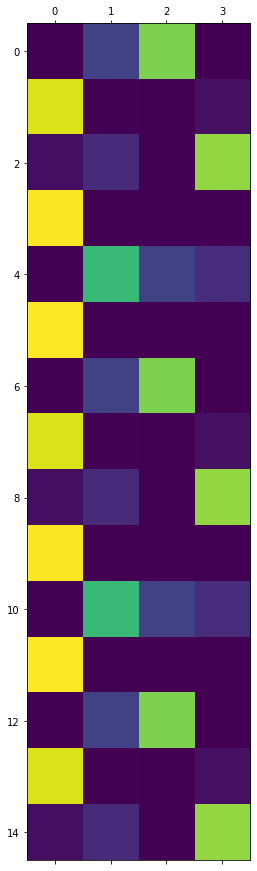

In [214]:
plt.matshow(yhat.data[-15:])

-   아주 특이한 특징: yhat\[:15\], yhat\[:-15\] 의 적합결과가 다르다
-   왜? 간장계란밥은 간장이 중요한데, 간장은 시간이 갈수록
    맛있어지니까..

### 순환신경망 구현2 (with RNNCell) – 성공

ref: https://pytorch.org/docs/stable/generated/torch.nn.RNNCell.html

`(1)` 숙성네트워크

선언

In [215]:
rnncell = torch.nn.RNNCell(4,2)

가중치초기화 (순환신경망 구현1과 동일하도록)

In [216]:
torch.manual_seed(43052)
_rnncell = rNNCell()

In [217]:
rnncell.weight_ih.data = _rnncell.i2h.weight.data 
rnncell.weight_hh.data = _rnncell.h2h.weight.data 
rnncell.bias_hh.data = _rnncell.h2h.bias.data 
rnncell.bias_ih.data = _rnncell.i2h.bias.data 

`(2)` 조리담당 네트워크

In [218]:
torch.manual_seed(43052)
cook = torch.nn.Linear(2,4) 

`(3)` 손실함수, 옵티마이저 설계

In [221]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(rnncell.parameters())+list(cook.parameters()))

`(4)` 학습 (6분정도 걸림)

In [222]:
T = len(x) 
for epoc in range(5000): 
    ## 1~2
    loss = 0 
    ht = torch.zeros(1,2) 
    for t in range(T):
        xt,yt = x[[t]], y[[t]]
        ht = rnncell(xt,ht) 
        ot = cook(ht) 
        loss = loss + loss_fn(ot,yt) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`(5)` 시각화

In [223]:
T = len(x) 
hidden = torch.zeros(T,2) # 599년치 h를 담을 변수 
_water = torch.zeros(1,2) # 맹물 
hidden[[0]] = rnncell(x[[0]],_water) 
for t in range(1,T):
    hidden[[t]] = rnncell(x[[t]],hidden[[t-1]]) 

In [224]:
yhat = soft(cook(hidden))
yhat

tensor([[1.6522e-02, 6.2036e-01, 1.0433e-01, 2.5879e-01],
        [9.9965e-01, 6.5788e-05, 1.8450e-05, 2.6785e-04],
        [7.6673e-05, 1.9704e-01, 8.0201e-01, 8.7218e-04],
        ...,
        [7.4634e-05, 1.9501e-01, 8.0407e-01, 8.4751e-04],
        [9.4785e-01, 7.4711e-03, 6.1182e-04, 4.4064e-02],
        [3.6306e-02, 1.2466e-01, 2.8862e-03, 8.3615e-01]],
       grad_fn=<SoftmaxBackward0>)

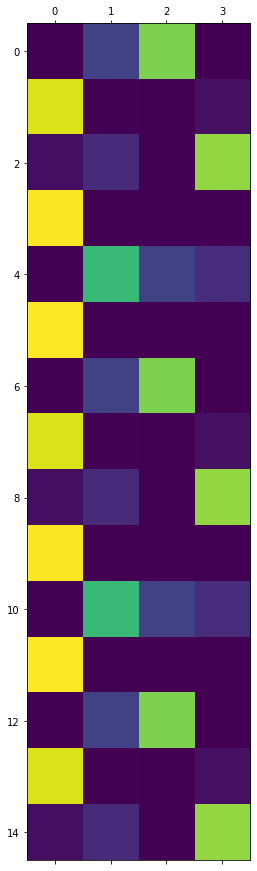

In [225]:
plt.matshow(yhat.data[-15:])

### 순환신경망 구현3 (with RNN) – 성공

(예비학습)

`-` 아무리 생각해도 yhat구하려면 좀 귀찮음

In [226]:
T = len(x) 
hidden = torch.zeros(T,2) # 599년치 h를 담을 변수 
_water = torch.zeros(1,2) # 맹물 
hidden[[0]] = rnncell(x[[0]],_water) 
for t in range(1,T):
    hidden[[t]] = rnncell(x[[t]],hidden[[t-1]])

In [227]:
soft(cook(hidden))

tensor([[1.6522e-02, 6.2036e-01, 1.0433e-01, 2.5879e-01],
        [9.9965e-01, 6.5788e-05, 1.8450e-05, 2.6785e-04],
        [7.6673e-05, 1.9704e-01, 8.0201e-01, 8.7218e-04],
        ...,
        [7.4634e-05, 1.9501e-01, 8.0407e-01, 8.4751e-04],
        [9.4785e-01, 7.4711e-03, 6.1182e-04, 4.4064e-02],
        [3.6306e-02, 1.2466e-01, 2.8862e-03, 8.3615e-01]],
       grad_fn=<SoftmaxBackward0>)

`-` 이렇게 하면 쉽게(?) 구할 수 있음

In [228]:
rnn = torch.nn.RNN(4,2) 

In [229]:
rnn.weight_hh_l0.data = rnncell.weight_hh.data 
rnn.bias_hh_l0.data = rnncell.bias_hh.data 
rnn.weight_ih_l0.data = rnncell.weight_ih.data 
rnn.bias_ih_l0.data = rnncell.bias_ih.data 

In [230]:
_water

tensor([[0., 0.]])

In [231]:
soft(cook(rnn(x,_water)[0]))

tensor([[1.6522e-02, 6.2036e-01, 1.0433e-01, 2.5879e-01],
        [9.9965e-01, 6.5788e-05, 1.8450e-05, 2.6785e-04],
        [7.6673e-05, 1.9704e-01, 8.0201e-01, 8.7218e-04],
        ...,
        [7.4634e-05, 1.9501e-01, 8.0407e-01, 8.4751e-04],
        [9.4785e-01, 7.4711e-03, 6.1182e-04, 4.4064e-02],
        [3.6306e-02, 1.2466e-01, 2.8862e-03, 8.3615e-01]],
       grad_fn=<SoftmaxBackward0>)

-   똑같음!

`-` rnn(x,\_water)의 결과는 (1) 599년치 간장 (2) 599번째 간장 이다

In [232]:
rnn(x,_water)

(tensor([[-0.2232,  0.9769],
         [-0.9999, -0.9742],
         [ 0.9154,  0.9992],
         ...,
         [ 0.9200,  0.9992],
         [-0.9978, -0.0823],
         [-0.9154,  0.9965]], grad_fn=<SqueezeBackward1>),
 tensor([[-0.9154,  0.9965]], grad_fn=<SqueezeBackward1>))

***(예비학습결론) torch.nn.RNN(4,2)는 torch.nn.RNNCell(4,2)의 batch
버전이다. (for문이 포함된 버전이다)***

------------------------------------------------------------------------

torch.nn.RNN(4,2)를 이용하여 구현하자.

`(1)` 숙성네트워크

선언

In [233]:
torch.manual_seed(43052)
rnn = torch.nn.RNN(4,2)

`(2)` 조리네트워크

In [234]:
torch.manual_seed(43052)
cook = torch.nn.Linear(2,4)

`(3)` 손실함수와 옵티마이저

In [235]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(rnn.parameters())+list(cook.parameters())) # 우리가 배울것: 숙성하는 방법 + 요리하는 방법 

`(4)` 학습

In [236]:
for epoc in range(5000):
    ## 1
    _water = torch.zeros(1,2)
    hidden, _ = rnn(x,_water)
    output = cook(hidden)
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`(5)` 시각화

In [237]:
yhat = soft(cook(rnn(x,_water)[0]))
yhat

tensor([[1.9725e-02, 1.5469e-03, 8.2766e-01, 1.5106e-01],
        [9.1875e-01, 1.6513e-04, 6.7703e-02, 1.3384e-02],
        [2.0031e-02, 1.0659e-03, 8.5248e-01, 1.2642e-01],
        ...,
        [1.9640e-02, 1.3568e-03, 8.3705e-01, 1.4196e-01],
        [9.9564e-01, 1.3114e-05, 3.5069e-03, 8.4108e-04],
        [3.5473e-03, 1.5670e-01, 1.4102e-01, 6.9873e-01]],
       grad_fn=<SoftmaxBackward0>)

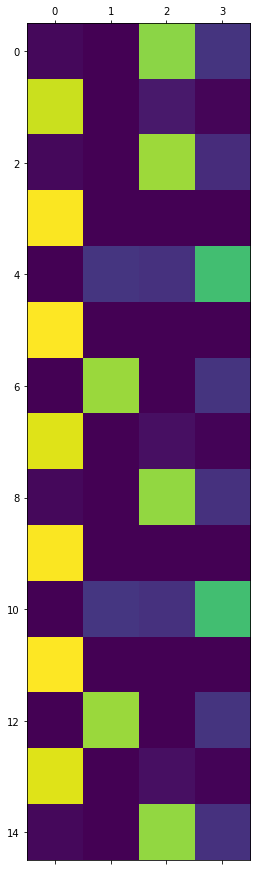

In [238]:
plt.matshow(yhat.data[:15])